## Demo 3: CAST Projection reconstructs spatially resolved single-cell multi-omics from multiple samples

In [10]:
import CAST
import scanpy as sc
import os
import numpy as np
import warnings
warnings.filterwarnings("ignore")

work_dir = '$demo_path' #### input the demo path

The `CAST_PROJECT()` function is used to project the `source_sample` (query sample) to `target_sample` (reference sample). To do this, it assigns single cells from the query samples to the reference sample with the closest physical location and the most similar gene expression profile (e.g. the same cell type and cell state).


In [8]:
### Set up output path

# Main demo_output directory
output_path = f'{work_dir}/demo3_CAST_Projection/demo_output'
os.makedirs(output_path,exist_ok=True)

# Subdirectories for each replicate
graph_list = {'rep1':['STAR_rep1','RIBO_rep1']} # source_sample, target_sample
for rep in graph_list.keys():
    print(f'Start the {rep} samples:')
    source_sample, target_sample = graph_list[rep]
    output_path_t = f'{output_path}/{source_sample}_to_{target_sample}'
    os.makedirs(output_path_t,exist_ok=True)

Start the rep1 samples:


In [3]:
### Color dictionary for visulization 

color_dict = {
        'TEPN': '#256b00',
        'INH': '#ee750a',
        'CHO_PEP': '#f280cf',
        'DE_MEN': '#f24f4b',
        'AC': '#e8e879',
        'OLG': '#a8e1eb',
        'VAS': '#395ba8',
        'CHOR_EPEN': '#697491',
        'PVM': '#8803fc',
        'MLG': '#23ccb8',
        'OPC': '#667872',
        'Other': '#ebebeb'
    }

### Load and Preprocess the data 

In [11]:
### Load and preprocess the data 
### This dataset contains 4 samples (STAR_rep1, RIBO_rep1, STAR_rep2, RIBO_rep2) and integrated features ('X_pca_harmony')

from CAST.utils import preprocess_fast


sdata = sc.read_h5ad(f'{output_path}/../data/demo3.h5ad')
sdata = CAST.preprocess_fast(sdata,mode = 'default')
batch_key = 'sample'

Preprocessing...


### CAST Project to project the STARmap data to the RIBOmap data

Start the rep1 samples:
Using the pre-integrated data X_pca_harmony and the UMAP X_umap
Start to project AC cells:
Using cosine distance to calculate cell low dimensional distance:


4it [00:16,  4.25s/it]


Start to project CHOR_EPEN cells:
Using cosine distance to calculate cell low dimensional distance:


1it [00:01,  1.37s/it]


Start to project CHO_PEP cells:
Using cosine distance to calculate cell low dimensional distance:


3it [00:06,  2.17s/it]


Start to project DE_MEN cells:
Using cosine distance to calculate cell low dimensional distance:


2it [00:04,  2.16s/it]


Start to project INH cells:
Using cosine distance to calculate cell low dimensional distance:


2it [00:03,  1.52s/it]


Start to project MLG cells:
Using cosine distance to calculate cell low dimensional distance:


1it [00:02,  2.34s/it]


Start to project OLG cells:
Using cosine distance to calculate cell low dimensional distance:


5it [00:09,  1.96s/it]


Start to project OPC cells:
Using cosine distance to calculate cell low dimensional distance:


1it [00:00,  1.21it/s]


Start to project Other cells:
Using cosine distance to calculate cell low dimensional distance:


1it [00:02,  2.14s/it]


Start to project PVM cells:
Using cosine distance to calculate cell low dimensional distance:


1it [00:01,  1.26s/it]


Start to project TEPN cells:
Using cosine distance to calculate cell low dimensional distance:


9it [00:18,  2.10s/it]


Start to project VAS cells:
Using cosine distance to calculate cell low dimensional distance:


3it [00:07,  2.36s/it]


Generate evaluation plots:


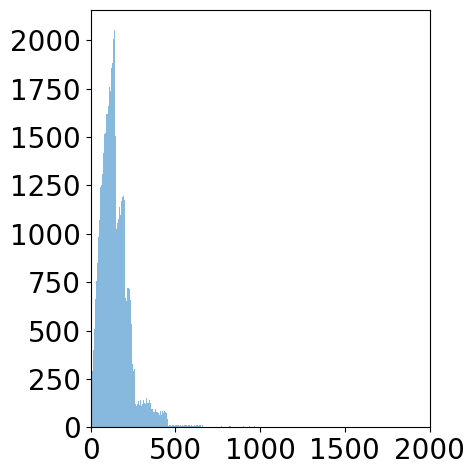

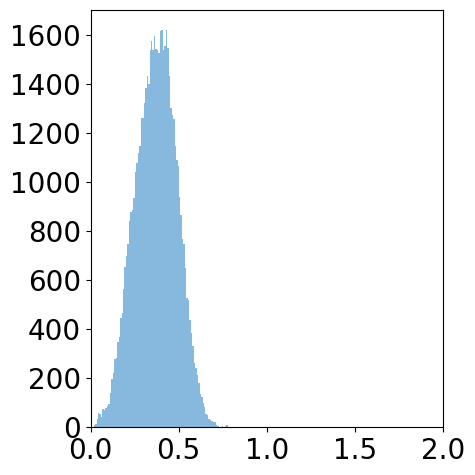

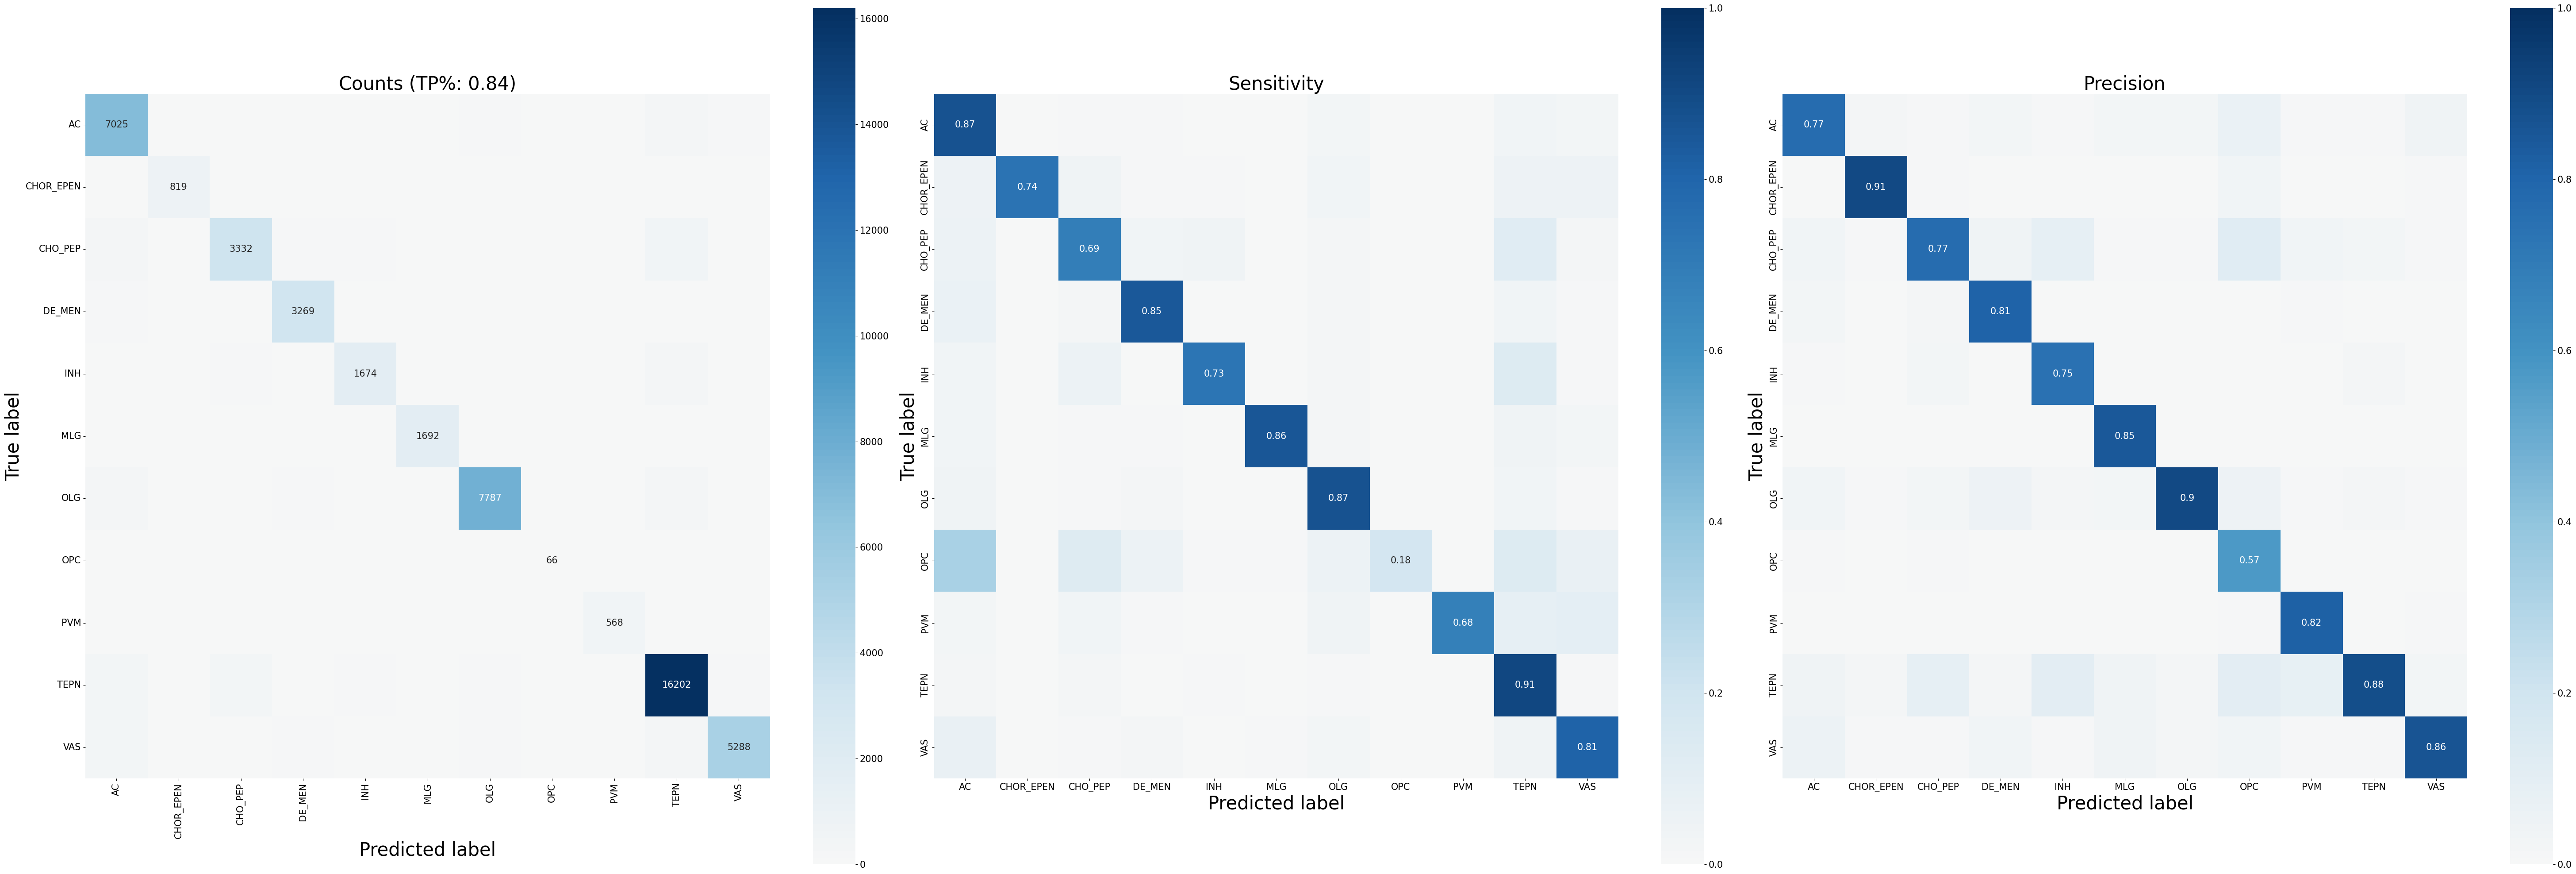

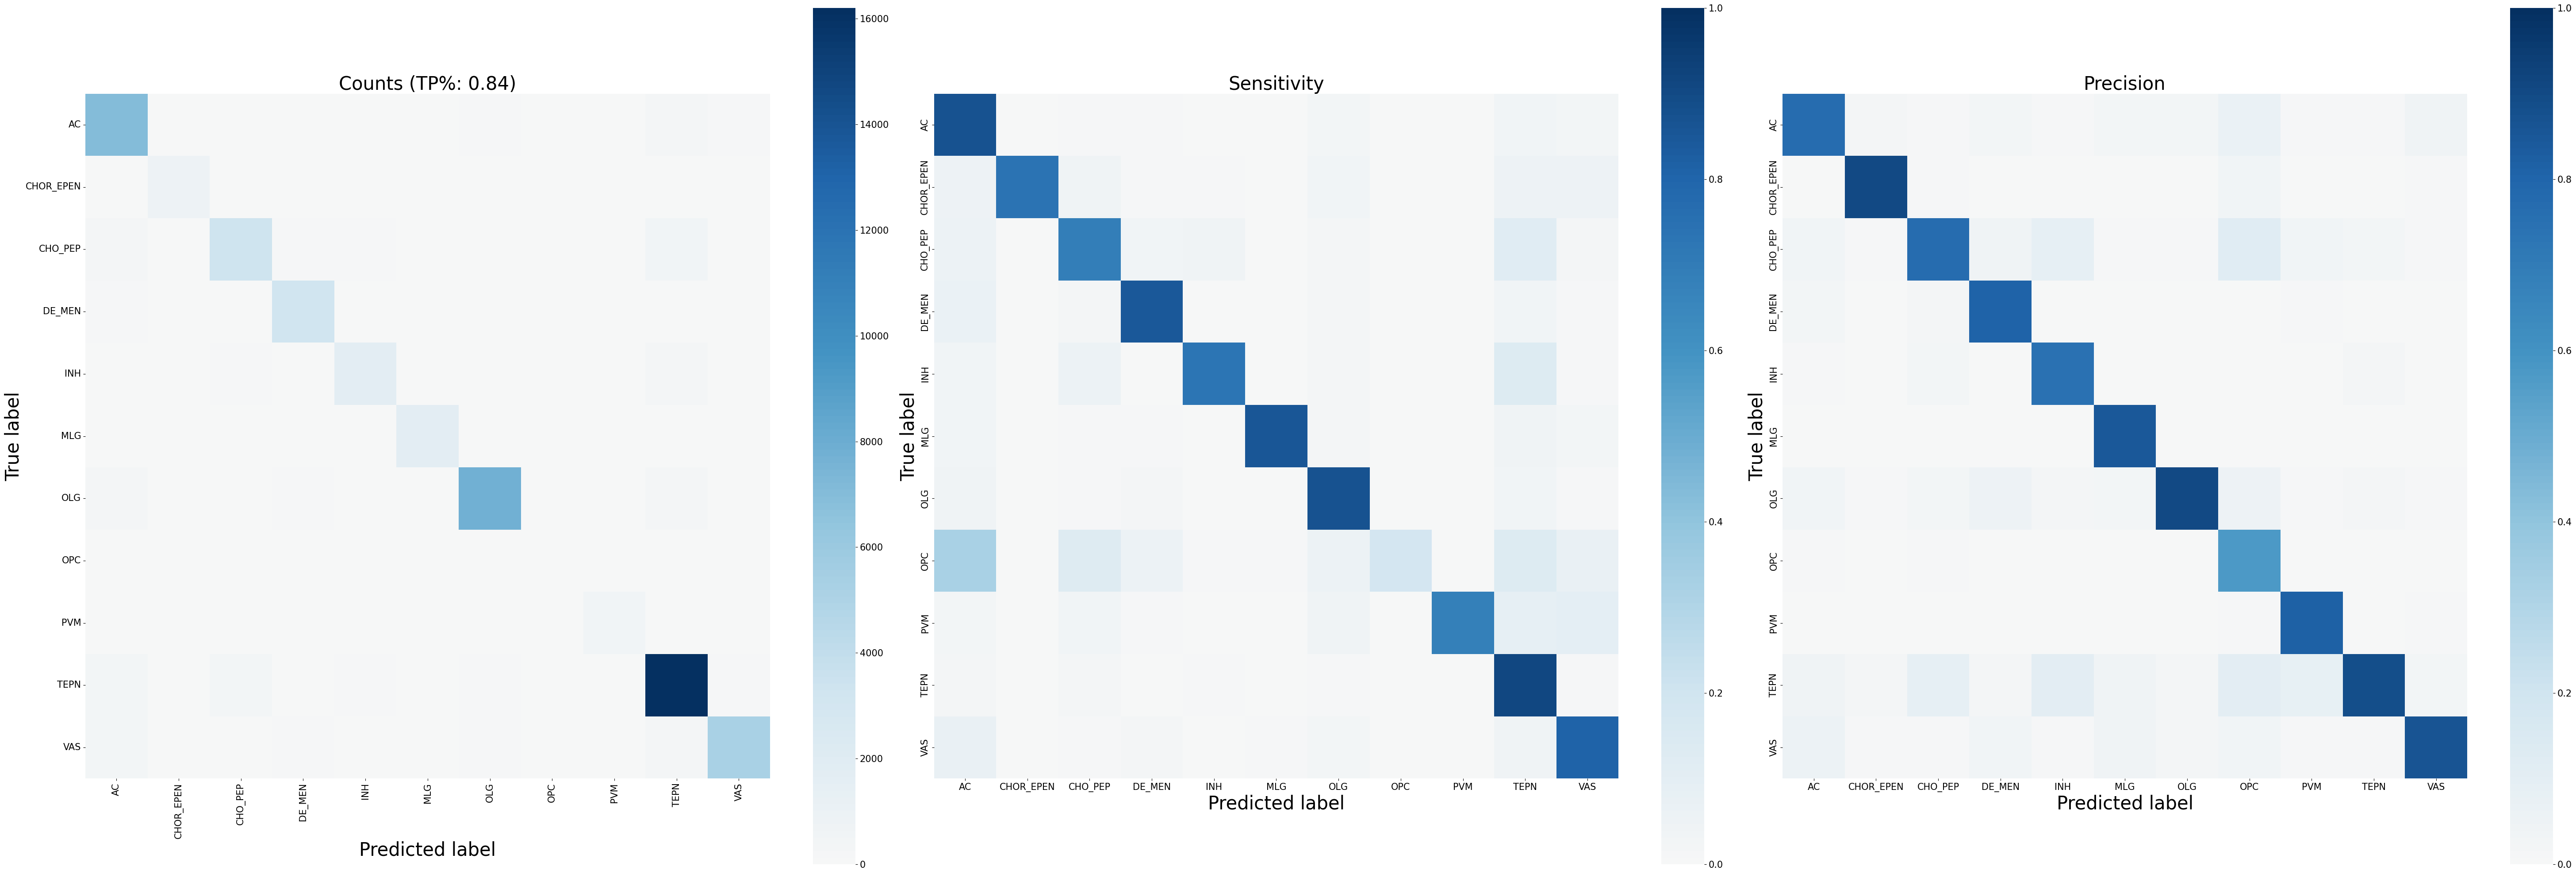

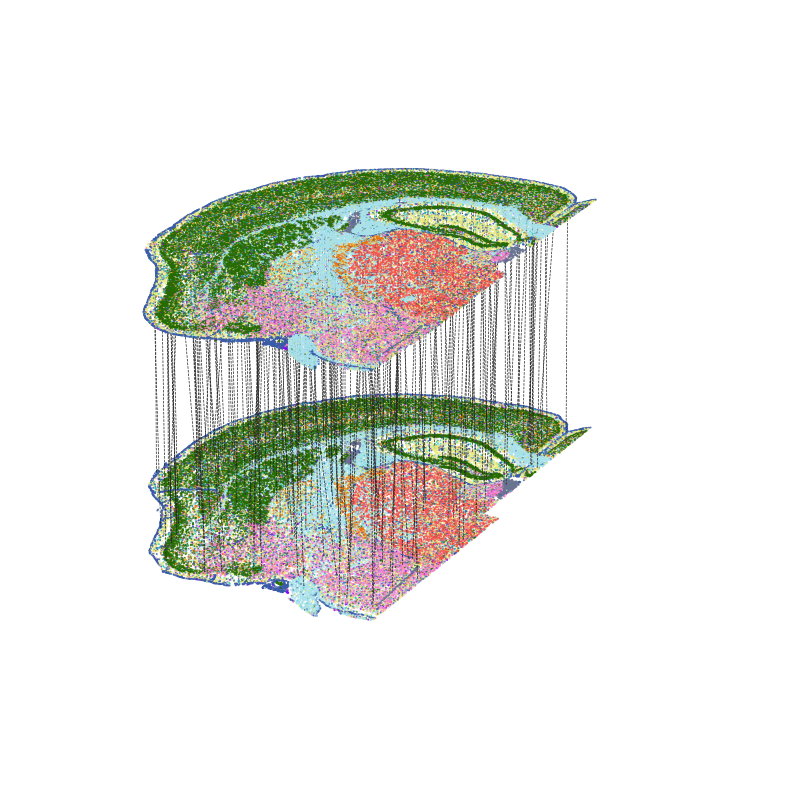

In [12]:
### Run CAST Project 

from CAST import CAST_PROJECT


sdata_refs = {} 
list_ts = {}
for rep in graph_list.keys():
    print(f'Start the {rep} samples:')
    source_sample, target_sample = graph_list[rep]

    # CAST Project
    sdata_refs[rep],list_ts[rep] = CAST.CAST_PROJECT(
        sdata_inte = sdata[np.isin(sdata.obs[batch_key],[source_sample, target_sample])], # the integrated dataset
        source_sample = source_sample, # the source sample name
        target_sample = target_sample, # the target sample name
        coords_source = np.array(sdata[np.isin(sdata.obs[batch_key],source_sample),:].obs.loc[:,['x','y']]), # the coordinates of the source sample
        coords_target = np.array(sdata[np.isin(sdata.obs[batch_key],target_sample),:].obs.loc[:,['x','y']]), # the coordinates of the target sample
        scaled_layer = 'log1p_norm_scaled', # the scaled layer name in `adata.layers`, which is used to be integrated
        batch_key = batch_key, # the column name of the samples in `obs`
        source_sample_ctype_col = 'cell_type', # the column name of the cell type in `obs`
        output_path = f'{output_path}/{source_sample}_to_{target_sample}', # the output path
        integration_strategy = None, # 'Harmony' or None (use existing integrated features)
        color_dict = color_dict # the color dict for the cell type
    )